<a href="https://colab.research.google.com/github/szsavery/DSPS_SSavery/blob/main/HW2/CentralLimitTheorem_Savery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total),
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For distribution plot the sample mean of each sample (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

In [ ]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
from scipy import stats

%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use

In [ ]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which *population* mean to give it (it will be the same for each distribution)

In [ ]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this!

![1](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq2.png)

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare

In class aI used scipy.stats. You are free to use what you want!



In [ ]:
# the chi sq distribution takes the number of degrees of freedom,
# which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful! But youn can do this however you want

Lets start by looking at a single chi sq distribution of 100 elements

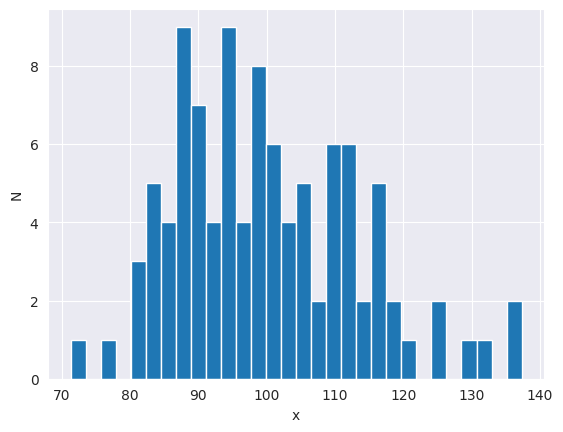

In [ ]:
# Note: I am adding imports here, to show the workflow:
# at this point I realize what packages I need and I import them.
# but this is a PEP8 violation.
# It is a good habit to put the includes at the top
# so the code fails right away if the packages are missing.
# Otherwise a user may have a piece of code running for a long time,
# and then fail when the package cannot be imported...
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456) #WHY DO I DO THIS?? So that the code gives the same results when run by different people
# prepare a container for all the distribution:
# a dictionary so you can call each family of distribution by "key"
mydists = {}
# mydists is an empty disctionary;
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['chisq'][100] = np.random.chisquare(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it:
#             an array of 100 elements by the key 100
pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom.

## let numpy calculate what the mean and stdev of this distribution are

In [ ]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydists['chisq'][100].mean(), mydists['chisq'][100].std()))

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution sizes. But you do not have to do it like this. You do you, just make it work.

In [ ]:
#mysize = (np.random.rand(100) * 1000).astype(int)
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
#mysize = (1000 / (np.array(np.arange(1, 101) + [10]))).astype(int)
#mysize = (np.logspace(1, 4.3, 100, base=10)).astype(int)

print ("shape of the 'size' list that contains the size of each distribution",
       mysize.shape)
print(mysize[90])
print(mysize[50]) #just checking to see what sizes get calculated

shape of the 'size' list that contains the size of each distribution (100,)
21
39


Text(0, 0.5, 'frequency')

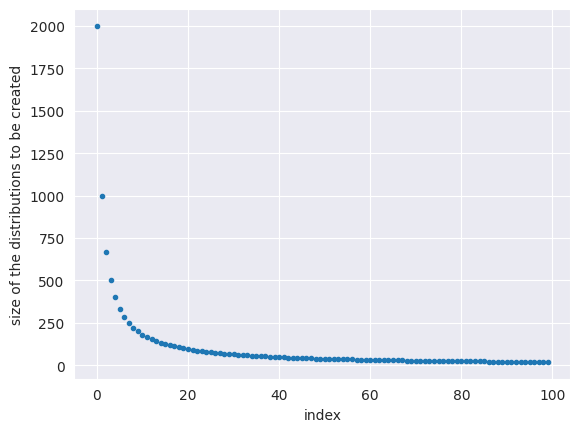

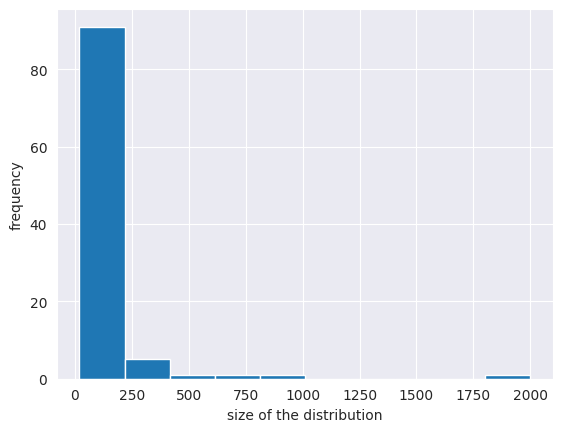

In [ ]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

pl.figure()
pl.hist(mysize)
pl.xlabel("size of the distribution")
pl.ylabel("frequency")


Figure 2: scatter plot and distribution of sample sizes for 100 samples to be created (note, the current choice does not produce more small then large distribution, which is desirable)

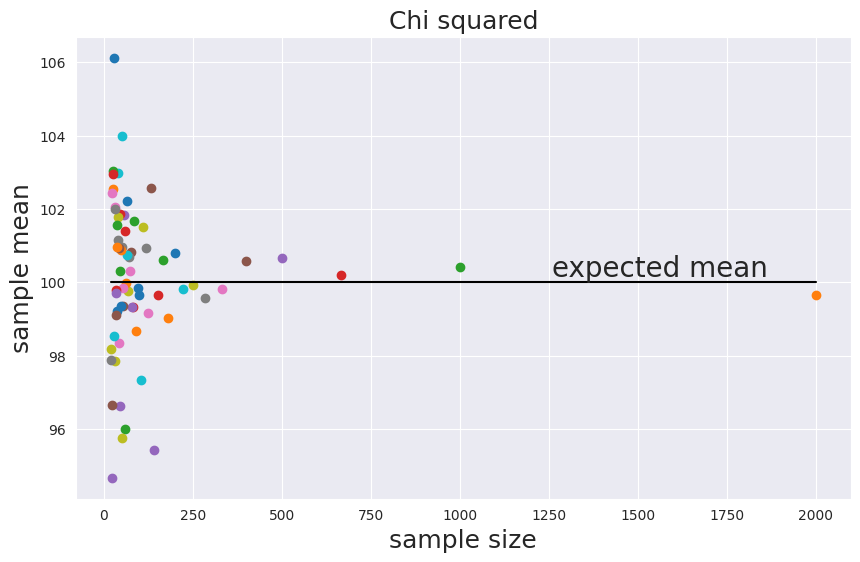

In [ ]:

# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
    mydists['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=100

# save the means for plotting later

mydists['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['means'][nn] = mydists['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

### Figure 2: [describe what you see and how it relates to the law of large numbers]

The plot of sample mean versus sample size, shows that as the sample increases in size its mean value slowly moves toward the expected value of 100. Initially the spread in mean is from 94 to 106. As the sample size is increased past 250, the sample mean has narrowed to a spread of approximately 1 around the expected value of 100. This illustrates the law of large numbers, the mean of the sample is trending toward the mean of the population as its size increases
towards infinity.

# now the histogram of the mean of all samples:
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

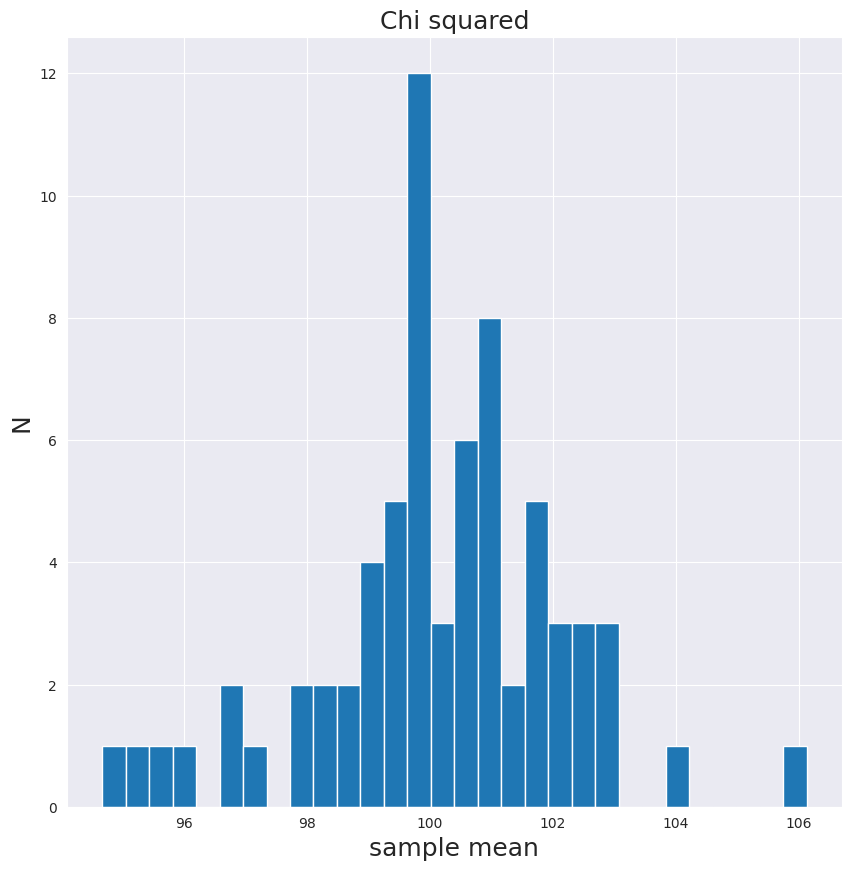

In [ ]:
allmeans = list(mydists['chisq']['means'].values())

tot_means = list(mydists['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.title('Chi squared', fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

## Figure 3:

This histogram shows that the most common sample mean for the Chi square distributions is the 99.6-100 bin as expected. However, the next two most common values are in the range from 100.4 to 101.2 with 14 values in total. This highlights that while the mean has trended toward its expected value, it hasn't completely settled there.

# Do it for the Normal distribution


Population mean is still 100. When using the normal distribution in numpy, a location and size must be given. Location will be the mean value for the total population, 100. Size will be the number of counts in the sample.

Done


Text(0, 0.5, 'frequency')

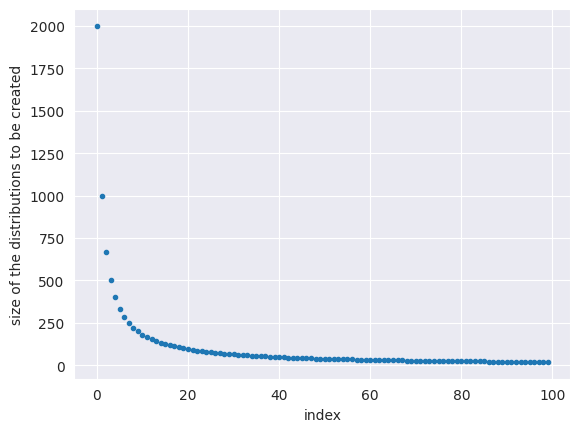

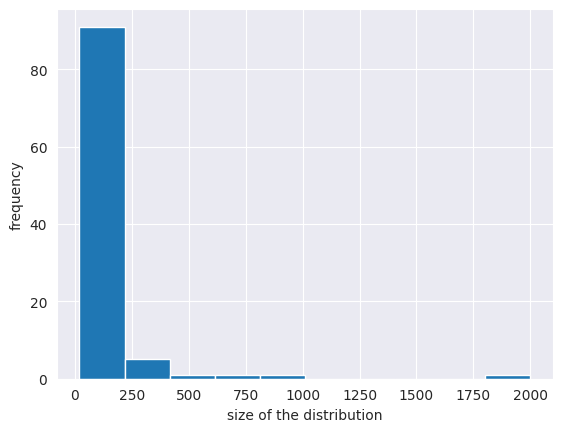

In [ ]:
mydists['normal'] = {}

print('Done')
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

pl.figure()
pl.hist(mysize)
pl.xlabel("size of the distribution")
pl.ylabel("frequency")

###Figure 4:

Using the same size distributions as for the Chi square samples. Will use these size distrbutions for all of the different types of distributions.

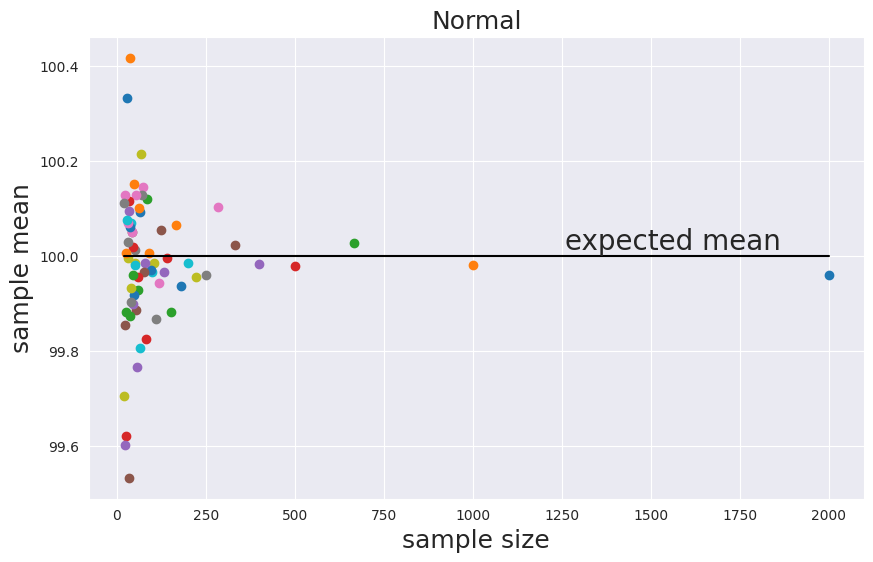

In [ ]:
for n in mysize:
    mydists['normal'][n] = np.random.normal(loc = mymean, size = n)

# save the means for plotting later

mydists['normal']['means'] = {}
# prepare the figure
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['normal']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['normal']['means'][nn] = mydists['normal'][nn].mean()
        #and plot it
        axnorm_mu_n.plot(nn, mydists['normal']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
axnorm_mu_n.set_title('Normal', fontsize=18)
axnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axnorm_mu_n.text(axnorm_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

###Figure 5:

The normal distributions have a very tiny spread in sample mean when compared to the Chi squared distribution, with the spread going from 99.4 to 100.4. Once the sample size reaches 250, the mean spread has decreased to approximately 0.2 around the expected value of 100. This again shows the law of large numbers.

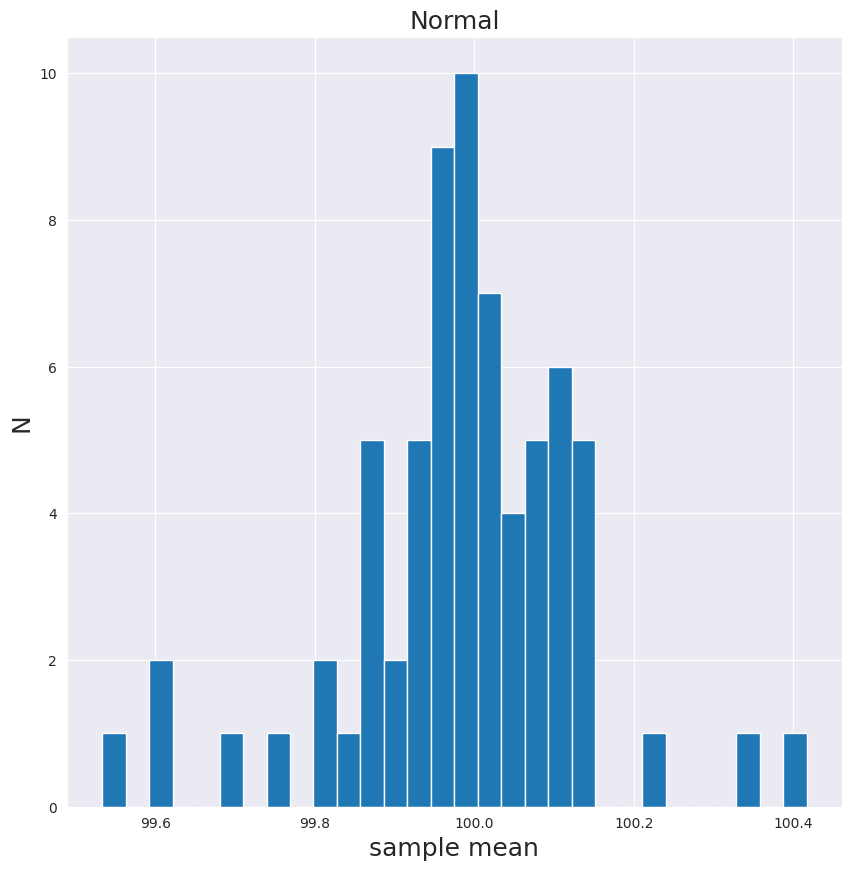

In [ ]:
allmeans2 = list(mydists['normal']['means'].values())

for i in range(len(allmeans2)):
  tot_means.append(allmeans2[i])

pl.figure(figsize=(10, 10))
pl.hist(allmeans2,bins=30)
pl.title('Normal', fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

###Figure 6

The histogram shows that the most common sample mean seen for the normal distributions is again right below 100. The three largest bins are all right around the expected value of 100, and contain 26 of the 100 samples.

# Do it for the Poisson distribution

Population mean is 100. Numpy code for Poisson takes a lam and size parameter. The lam parameter is the population mean and the size parameter gives the number of counts in the sample.

In [ ]:
mydists['poisson'] = {}

print('Done')

Done


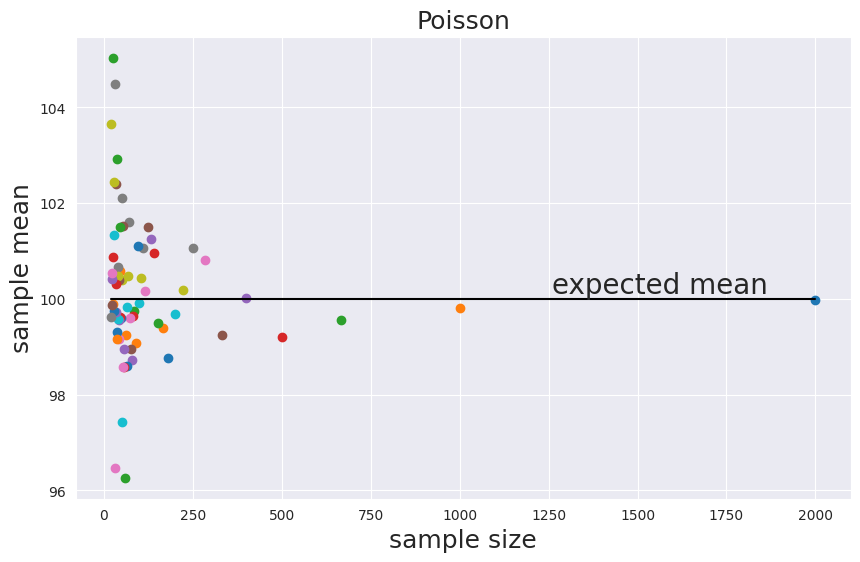

In [ ]:
for n in mysize:
    mydists['poisson'][n] = np.random.poisson(lam = mymean, size = n)

# save the means for plotting later

mydists['poisson']['means'] = {}
# prepare the figure
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['poisson']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['poisson']['means'][nn] = mydists['poisson'][nn].mean()
        #and plot it
        axpoisson_mu_n.plot(nn, mydists['poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
axpoisson_mu_n.set_title('Poisson', fontsize=18)
axpoisson_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axpoisson_mu_n.text(axpoisson_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

###Figure 7:

The Poisson distribution again shows the law of larger numbers, as the sample means are trending toward the expected value of 100 with increasing size. The initial spread in mean is from 96 to 105. Again after the sample size has reached 250, the spread has shrunk much closer to the expected value.

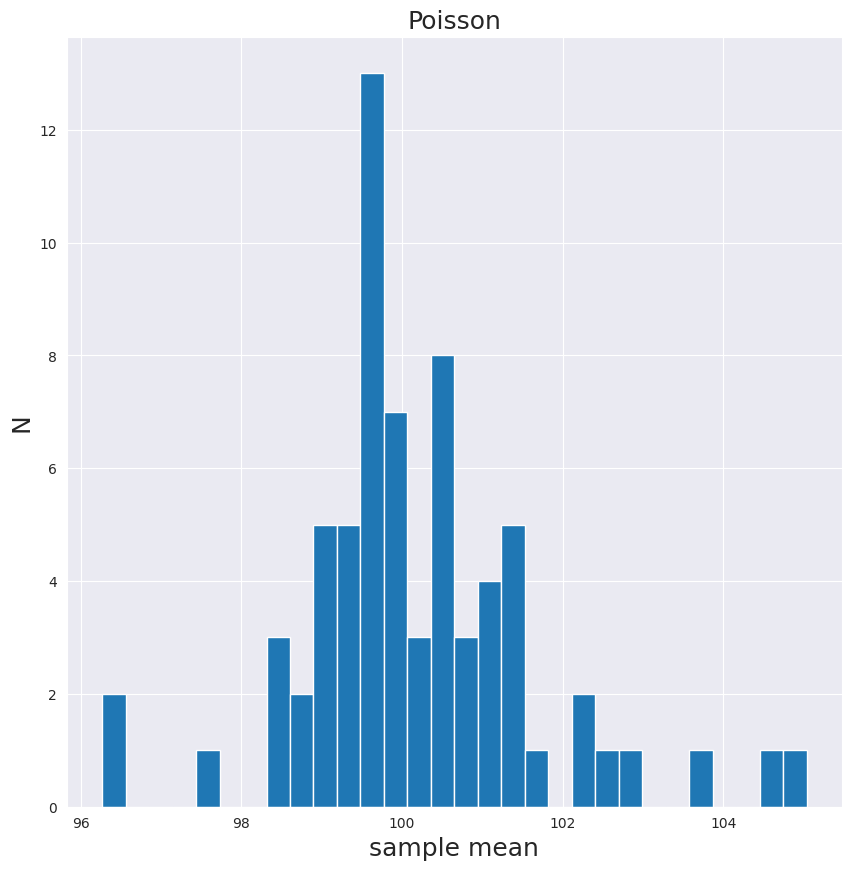

In [ ]:
allmeans3 = list(mydists['poisson']['means'].values())

for i in range(len(allmeans3)):
  tot_means.append(allmeans3[i])

pl.figure(figsize=(10, 10))
pl.hist(allmeans3,bins=30)
pl.title('Poisson', fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

###Figure 8:

The largest bin appears to be around a mean value of 99.6. There are 31 sample sets in the four bins centered on the expected value of 100.

# Do it for the Binomial distribution

For the Binomial distribution, the mean is found using $n*p$. For the numpy code to find a binomial distribution, the inputs n, p, and size are needed. Therefore to get a population mean of 100, need $n*p = 100$. I will set n = 200 and p = 0.5

In [ ]:
mydists['binomial'] = {}

print('Done')

Done


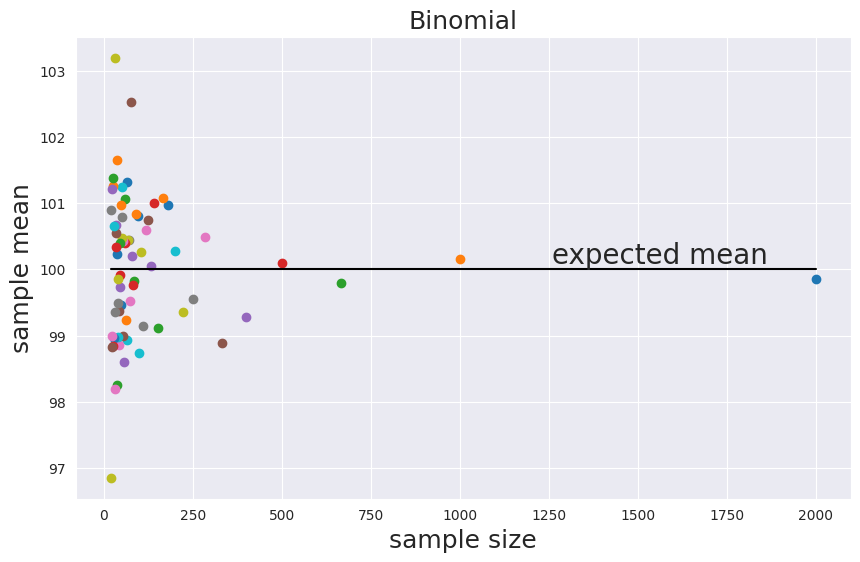

In [ ]:
for i in mysize:
    mydists['binomial'][i] = np.random.binomial(n = 200, p = 0.5,size = i)

# save the means for plotting later

mydists['binomial']['means'] = {}
# prepare the figure
axbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['binomial']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['binomial']['means'][nn] = mydists['binomial'][nn].mean()
        #and plot it
        axbinom_mu_n.plot(nn, mydists['binomial']['means'][nn], 'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
axbinom_mu_n.set_title('Binomial', fontsize=18)
axbinom_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axbinom_mu_n.text(axbinom_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

###Figure 9:

The spread in sample mean for the Binomial distributions goes from 97 to 103. Again after the sample size has reached 250, the spread has narrowed to go from 99 to 100.5.

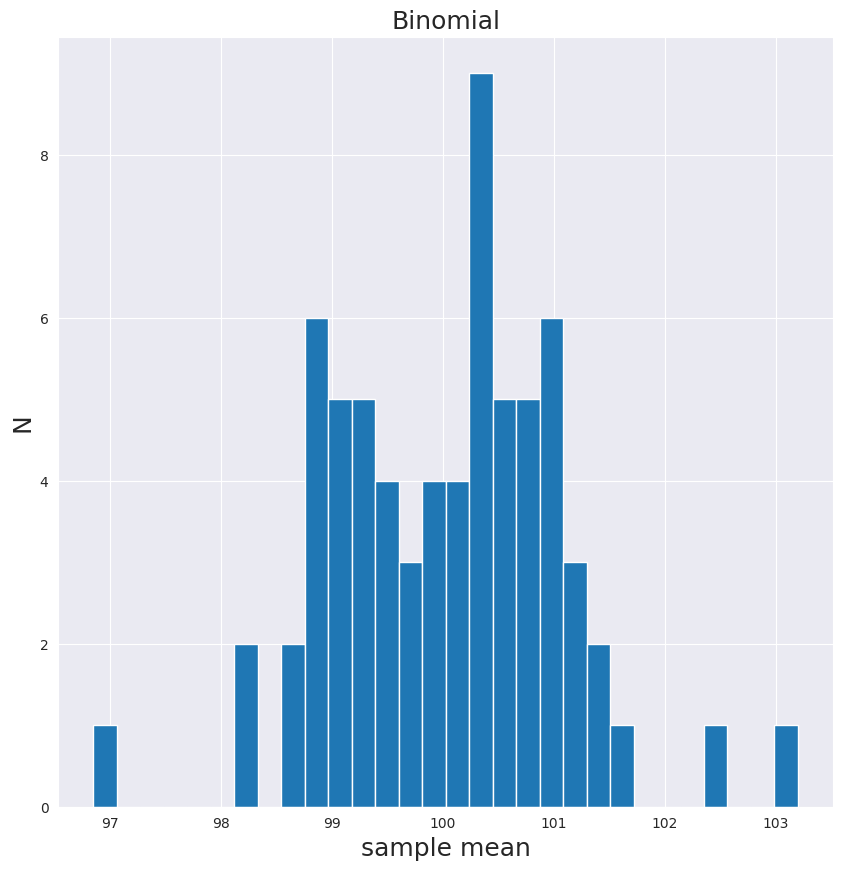

In [ ]:
allmeans4 = list(mydists['binomial']['means'].values())

for i in range(len(allmeans4)):
  tot_means.append(allmeans4[i])

pl.figure(figsize=(10, 10))
pl.hist(allmeans4,bins=30)
pl.title('Binomial', fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

###Figure 10:

The largest bin for the Binomial distribution is around 100.2 to 100.4, with 9 counts. It appears to have a larger spread in bins with 5+ counts, than the other distributions. This spread goes from around 98.8 to 101. I believe this is due to the lack of samples with size above 250. So while the law of numbers can be seen in the few larger samples, there aren't enough of these samples in the full data set to narrow the spread in bins.

# Do it for another distribution

Will use a Gamma distribution for the final type. Has parameters shape, scale, and size in Numpy. The population mean is 100. The mean for the Gamma distribution is equal to the shape*scale.

In [ ]:
mydists['gamma'] = {}

shape = 20
scale = 5

print('Done')

Done


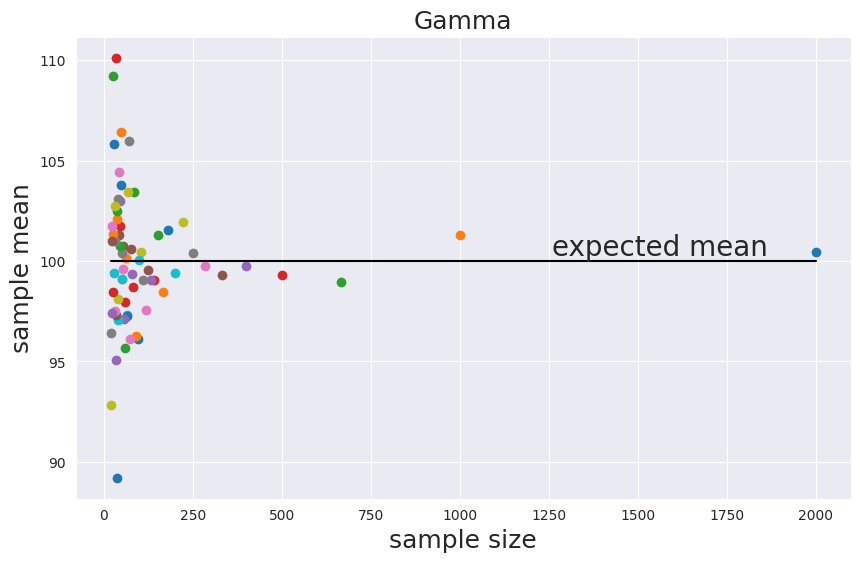

In [ ]:
for n in mysize:
    mydists['gamma'][n] = np.random.gamma(shape, scale, size = n)

# save the means for plotting later

mydists['gamma']['means'] = {}
# prepare the figure
axgamma_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['gamma']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['gamma']['means'][nn] = mydists['gamma'][nn].mean()
        #and plot it
        axgamma_mu_n.plot(nn, mydists['gamma']['means'][nn], 'o')
        axgamma_mu_n.set_xlabel('sample size', fontsize=18)
        axgamma_mu_n.set_ylabel('sample mean', fontsize=18)
axgamma_mu_n.set_title('Gamma', fontsize=18)
axgamma_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axgamma_mu_n.text(axgamma_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

###Figure 11:

The Gamma distribution has the largest initial spread that I have seen, going from aroung 89 to 110. Again 250 appears to be the sample size that allows for a narrowing in spread around the expected mean value, with a spread of about 2 or 3. This is the largest spread seen past this point.

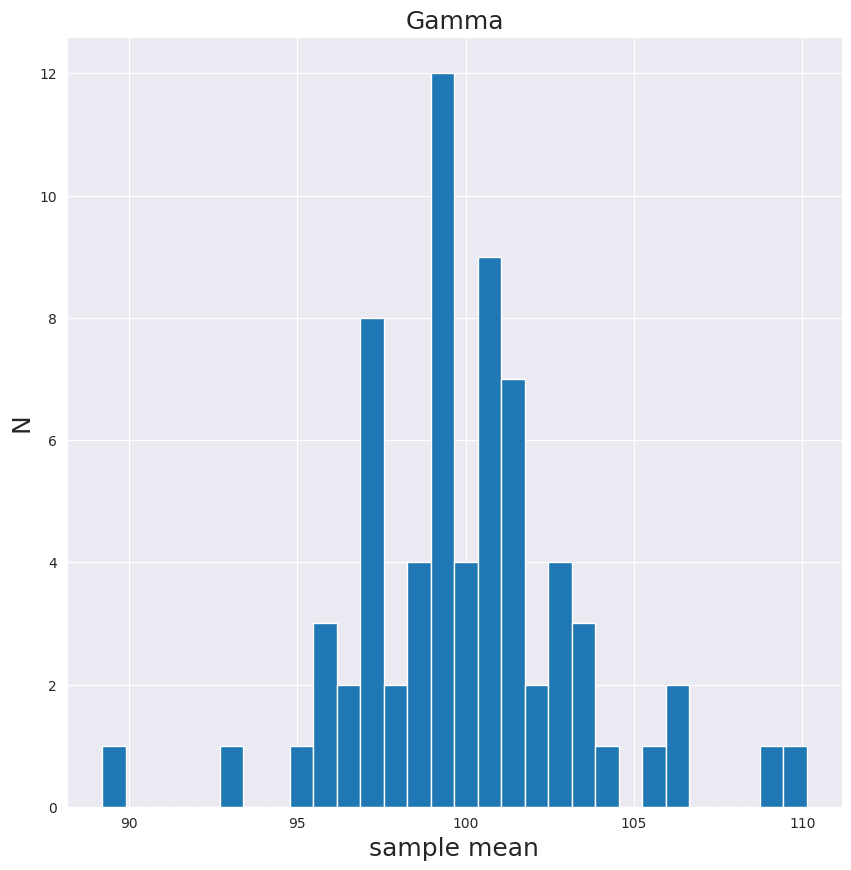

In [ ]:
allmeans5 = list(mydists['gamma']['means'].values())

for i in range(len(allmeans5)):
  tot_means.append(allmeans5[i])

pl.figure(figsize=(10, 10))
pl.hist(allmeans5,bins=30)
pl.title('Gamma', fontsize = 18)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

###Figure 12:

The two bins with most counts are centered around the expected value of 100. But, the Gamma distribution has a much larger spread in its four largest bins than the other distributions that I have examined.

# 661 students: fita  a Gaussian to the histogram of the means for each distribution

# Extra Credit for 461

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the height of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram.
(be careful that the x axis and the y axis are not the same size when you extract them from the pl.hist function cause the x represents the **edges** while what you want is the **centers** of each bin

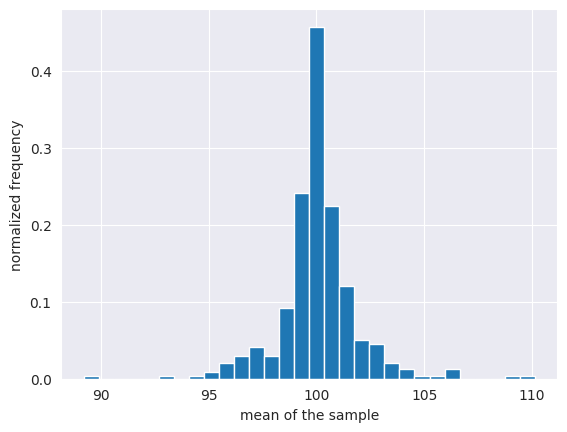

In [ ]:
height, bins, patch  = pl.hist(tot_means,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency")
pl.show()

In [ ]:
print(bins)

#To find the center of the bins
bin_centers = []

for i in range(len(bins)-1):
  center = (bins[i]+bins[i+1]) / 2
  bin_centers.append(center)


print(bin_centers)

[ 89.21059155  89.90772127  90.604851    91.30198072  91.99911044
  92.69624016  93.39336988  94.09049961  94.78762933  95.48475905
  96.18188877  96.87901849  97.57614822  98.27327794  98.97040766
  99.66753738 100.36466711 101.06179683 101.75892655 102.45605627
 103.15318599 103.85031572 104.54744544 105.24457516 105.94170488
 106.6388346  107.33596433 108.03309405 108.73022377 109.42735349
 110.12448322]
[89.55915641273393, 90.25628613484615, 90.95341585695837, 91.65054557907058, 92.34767530118279, 93.04480502329501, 93.74193474540724, 94.43906446751944, 95.13619418963167, 95.83332391174389, 96.5304536338561, 97.2275833559683, 97.92471307808053, 98.62184280019275, 99.31897252230496, 100.01610224441717, 100.7132319665294, 101.41036168864161, 102.10749141075382, 102.80462113286605, 103.50175085497827, 104.19888057709048, 104.89601029920269, 105.59314002131492, 106.29026974342713, 106.98739946553934, 107.68452918765158, 108.38165890976379, 109.078788631876, 109.7759183539882]


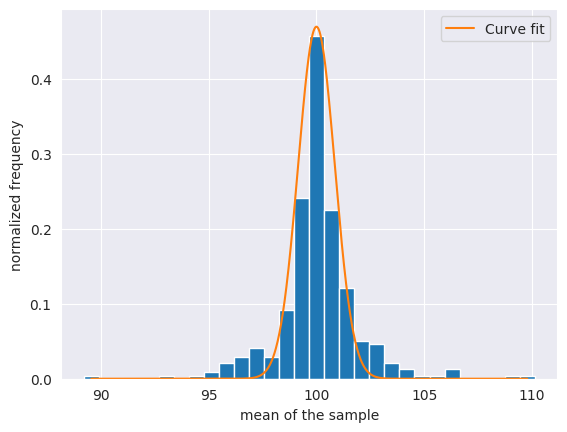

In [ ]:
x = np.linspace(bin_centers[0], bin_centers[-1], 1000)

y1 = stats.norm.pdf(x, loc = 100, scale = 0.85)

height, bins, patch  = pl.hist(tot_means,bins=30, density=True)
pl.plot(x, y1, label = 'Curve fit')
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency")
pl.legend()
pl.show()

And you can create your own Gaussian function to pass to curve_fit as this for example:

In [ ]:
#def gaussian(mu, sigma, x): # this is the gaussian you will fit
  #g = 1 / np.sqrt(2 * pi) / sigma * np.exp(-(x - mu )**2 / 2/sigma**2)
  #return g
  #'''
  #REMEMBER TO WRITE A DOCSTRING THAT EXPLAINS WHAT A FUNCTION DOES EVERY TIME YOU WRITE A FUNCTION
  #https://www.python.org/dev/peps/pep-0257/
  #'''
#def fun(args, x, hb): # this is the function you will minimize
  #return ... # needs to return a single number representing the "distance" between the heigh of the histogram bins and the gaussian you create

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)

**You can do it by eye** (partial credit 0.5/1).

It would be better to do it programmatically. To fit the data you can use `scipy.minimize` or `scipy.optimize`

In [ ]:
#from scipy import optimize
#optimize.minimize?